In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import mwdata as mw


In [2]:
# import mwdata as mw # Alpha release
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime

In [4]:
pd.options.display.max_columns = 50

In [5]:
df = pd.read_csv("gs://sanofi-ml-workshop-lending-club/data/DR_Demo_Lending_Club.csv")

In [6]:
pd.options.display.max_colwidth = 100

In [7]:
df.shape

(10000, 28)

In [8]:
df.head()

Id  is_bad             emp_title emp_length home_ownership  annual_inc  \
0   1       0     Time Warner Cable         10       MORTGAGE     50000.0   
1   2       0     Ottawa University          1           RENT     39216.0   
2   3       0        Kennedy Wilson          4           RENT     65000.0   
3   4       0    TOWN OF PLATTEKILL         10       MORTGAGE     57500.0   
4   5       0  Belmont Correctional         10       MORTGAGE     50004.0   

  verification_status pymnt_plan  \
0        not verified          n   
1        not verified          n   
2        not verified          n   
3        not verified          n   
4   VERIFIED - income          n   

                                                                                                 Notes  \
0                                                                                                  NaN   
1    Borrower added on 04/14/11 > I will be using this loan to pay off expenses accrued in the last...   
2                                                                                                  NaN   
3                                                                                                  NaN   
4                                    I want to consolidate my debt, pay for a vacation and buy a ring.   

          purpose_cat                     purpose zip_code addr_state  \
0             medical                     Medical    766xx         TX   
1  debt consolidation  My Debt Consolidation Loan    660xx         KS   
2         credit card            AP Personal Loan    916xx         CA   
3  debt consolidation     Debt Consolidation Loan    124xx         NY   
4  debt consolidation                 consolidate    439xx         OH   

   debt_to_income  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0           10.87          0.0          12/1/92             0.0   
1            9.15          0.0          11/1/05             2.0   
2           11.24          0.0           6/1/70             0.0   
3            6.18          1.0           9/1/82             0.0   
4           19.03          0.0          10/1/99             4.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN      15.0      0.0   
1                     NaN                     NaN       4.0      0.0   
2                     NaN                     NaN       4.0      0.0   
3                    16.0                     NaN       6.0      0.0   
4                     NaN                     NaN       8.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  \
0      12087        12.1       44.0                   f   
1      10114        64.0        5.0                   f   
2         81         0.6        8.0                   f   
3      10030        37.1       23.0                   f   
4      10740        40.4       21.0                   f   

   collections_12_mths_ex_med  mths_since_last_major_derog policy_code  
0                         0.0                            1         PC4  
1                         0.0                            2         PC1  
2                         0.0                            3         PC4  
3                         0.0                            2         PC2  
4                         0.0                            3         PC3

In [9]:
df.drop(['Id'], axis=1, inplace=True)

In [10]:
mw.data_summary(df)

is_bad emp_title emp_length home_ownership  \
Data Type                 int64    object     object         object   
Mean                     0.1295                                       
Standard Deviation     0.335769                                       
Median                        0                                       
Min                           0                                       
Max                           1                                       
# Zeros                    8705                                       
# Nulls                       0       592          0              0   
% Most Frequent Value     87.05      0.36       21.6          47.45   

                      annual_inc verification_status pymnt_plan   Notes  \
Data Type                float64              object     object  object   
Mean                       68203                                          
Standard Deviation       48590.3                                          
Median                     58000                                          
Min                         2000                                          
Max                       900000                                          
# Zeros                        0                                          
# Nulls                        1                   0          0    3167   
% Most Frequent Value       3.81               43.67      99.98    0.62   

                      purpose_cat purpose zip_code addr_state debt_to_income  \
Data Type                  object  object   object     object        float64   
Mean                                                                 13.3387   
Standard Deviation                                                   6.75421   
Median                                                                 13.41   
Min                                                                        0   
Max                                                                    29.99   
# Zeros                                                                   58   
# Nulls                         0       4        0          0              0   
% Most Frequent Value       44.54     5.3     1.58      17.48           0.58   

                      delinq_2yrs earliest_cr_line inq_last_6mths  \
Data Type                 float64           object        float64   
Mean                     0.148174                         1.06693   
Standard Deviation        0.50627                         1.47605   
Median                          0                               1   
Min                             0                               0   
Max                            11                              25   
# Zeros                      8910                            4602   
# Nulls                         5                5              5   
% Most Frequent Value        89.1             0.95          46.02   

                      mths_since_last_delinq mths_since_last_record open_acc  \
Data Type                            float64                float64  float64   
Mean                                 35.8903                61.6524  9.33457   
Standard Deviation                   22.3614                46.1896  4.52659   
Median                                    34                     86        9   
Min                                        0                      0        1   
Max                                      120                    119       39   
# Zeros                                  163                    267        0   
# Nulls                                 6316                   9160        5   
% Most Frequent Value                   1.63                   2.67    10.35   

                         pub_rec revol_bal revol_util total_acc  \
Data Type                float64     int64    float64   float64   
Mean                   0.0601301     14271    48.4508   22.0113   
Standard Deviation      0.251245   25437.9    28.2206   11.7094   
Me

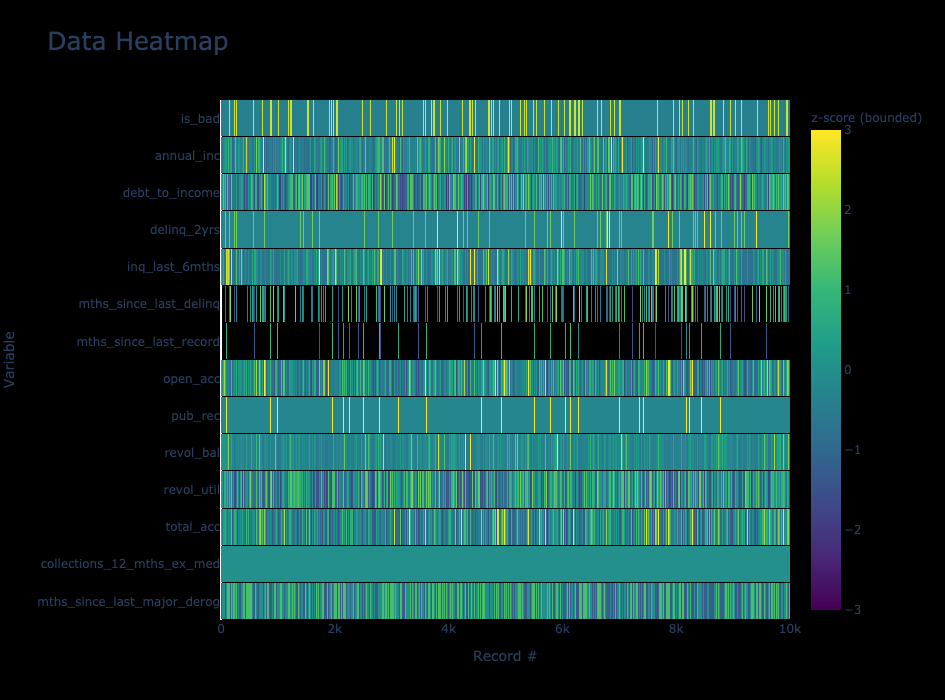

In [11]:
mw.data_heatmap(df)

In [12]:
import seaborn as sns

In [13]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

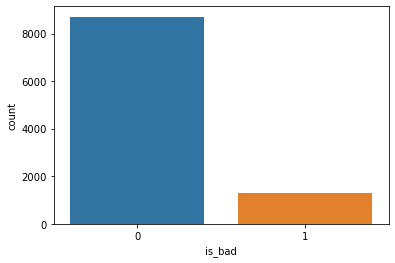

In [14]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [15]:
mw.data_summary(df[['open_acc', 'annual_inc']])

open_acc annual_inc
Data Type              float64    float64
Mean                   9.33457      68203
Standard Deviation     4.52659    48590.3
Median                       9      58000
Min                          1       2000
Max                         39     900000
# Zeros                      0          0
# Nulls                      5          1
% Most Frequent Value    10.35       3.81

# Inspection of high income applicants

In [16]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

is_bad          emp_title emp_length home_ownership  annual_inc  \
240        0  J.P. Morgan Chase         10           RENT    900000.0   
1296       0                IBM         10       MORTGAGE    744000.0   
4577       1             vmware          4       MORTGAGE    700000.0   
6816       0   The Ayco Company         10       MORTGAGE    725000.0   
7425       0     d&d sexton inc         10           RENT    780000.0   

           verification_status pymnt_plan  \
240   VERIFIED - income source          n   
1296  VERIFIED - income source          n   
4577              not verified          n   
6816         VERIFIED - income          n   
7425              not verified          n   

                                                                                                    Notes  \
240                       Borrower added on 09/10/10 > This loan will be repaid by February 1, 2011.<br/>   
1296                                                 Borrower added on 10/18/10 > Debt Consolidation<br/>   
4577                                                                 Looking for loan to complete remodel   
6816    Borrower added on 09/05/11 > I plan to use the loan to consolidate a few debts purchase a few ...   
7425                                       Borrower added on 08/22/10 > down payment and moving cost<br/>   

             purpose_cat        purpose zip_code addr_state  debt_to_income  \
240              wedding   Wedding loan    100xx         NY            1.04   
1296  debt consolidation     Jon's Loan    495xx         MI            1.44   
4577    home improvement           1717    333xx         FL            3.09   
6816  debt consolidation  Personal Loan    750xx         TX            5.40   
7425               house     House Loan    648xx         MO            0.52   

      delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
240           3.0          11/1/99             0.0                     5.0   
1296          0.0           1/1/95             5.0                     NaN   
4577          0.0           2/1/99             0.0                    33.0   
6816          0.0           2/1/94             2.0                    55.0   
7425          0.0           2/1/87             3.0                     NaN   

      mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
240                      NaN       6.0      0.0        301        13.1   
1296                     NaN      14.0      0.0      17166        63.6   
4577                     NaN       8.0      0.0       6960        44.6   
6816                     NaN      18.0      0.0      62892        70.3   
7425                   113.0       8.0      1.0       1608        11.1   

      total_acc initial_list_status  collections_12_mths_ex_med  \
240        22.0                   f                         0.0   
1296       52.0                   f                         0.0   
4577       14.0                   f                         0.0   
6816       53.0                   f                         0.0   
7425       11.0                   f                         0.0   

      mths_since_last_major_derog policy_code  
240                             3         PC3  
1296                            2         PC4  
4577                            2         PC4  
6816                            3         PC2  
7425                            2         PC2

# Histograms

Text(0.5, 1.0, 'Histogram of open_acc')

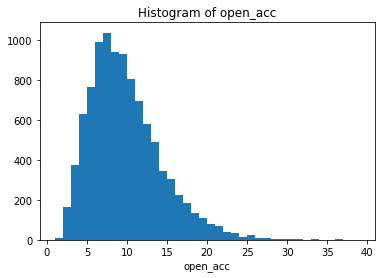

In [17]:
ax = df['open_acc'].hist(bins=38, grid=False) 
ax.set_xlabel('open_acc')
ax.set_title("Histogram of open_acc")

Text(0.5, 1.0, 'Histogram of revol_bal')

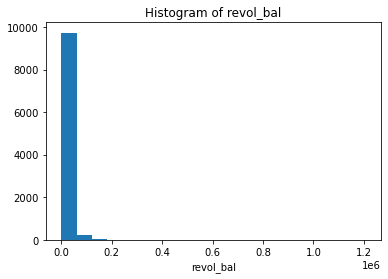

In [18]:
ax = df['revol_bal'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_bal')
ax.set_title("Histogram of revol_bal")

In [19]:
mw.data_summary(df[['revol_bal', 'annual_inc']])

revol_bal annual_inc
Data Type                 int64    float64
Mean                      14271      68203
Standard Deviation      25437.9    48590.3
Median                   8645.5      58000
Min                           0       2000
Max                     1207359     900000
# Zeros                     278          0
# Nulls                       0          1
% Most Frequent Value      2.78       3.81

Text(0.5, 1.0, 'Histogram of revol_util')

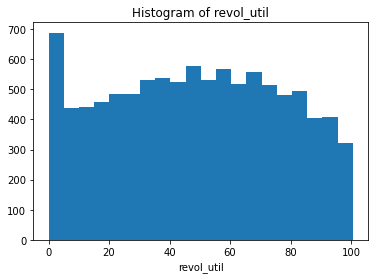

In [20]:
ax = df['revol_util'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_util')
ax.set_title("Histogram of revol_util")

In [21]:
mw.data_summary(df[['revol_util', 'annual_inc']])

revol_util annual_inc
Data Type                float64    float64
Mean                     48.4508      68203
Standard Deviation       28.2206    48590.3
Median                      48.7      58000
Min                            0       2000
Max                        100.6     900000
# Zeros                      254          0
# Nulls                       26          1
% Most Frequent Value       2.54       3.81

Text(0.5, 1.0, 'Histogram of delinq_2yrs')

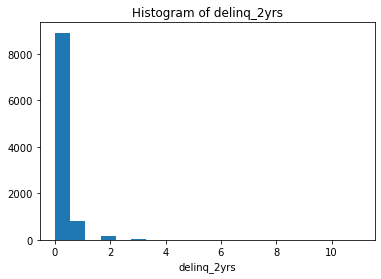

In [22]:
ax = df['delinq_2yrs'].hist(bins=20, grid=False) 
ax.set_xlabel('delinq_2yrs')
ax.set_title("Histogram of delinq_2yrs")

In [23]:
mw.data_summary(df[['delinq_2yrs', 'annual_inc']])

delinq_2yrs annual_inc
Data Type                 float64    float64
Mean                     0.148174      68203
Standard Deviation        0.50627    48590.3
Median                          0      58000
Min                             0       2000
Max                            11     900000
# Zeros                      8910          0
# Nulls                         5          1
% Most Frequent Value        89.1       3.81

Text(0.5, 1.0, 'Histogram of inq_last_6mths')

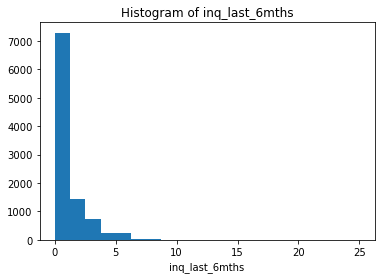

In [24]:
ax = df['inq_last_6mths'].hist(bins=20, grid=False) 
ax.set_xlabel('inq_last_6mths')
ax.set_title("Histogram of inq_last_6mths")

In [25]:
mw.data_summary(df[['inq_last_6mths', 'annual_inc']])

inq_last_6mths annual_inc
Data Type                    float64    float64
Mean                         1.06693      68203
Standard Deviation           1.47605    48590.3
Median                             1      58000
Min                                0       2000
Max                               25     900000
# Zeros                         4602          0
# Nulls                            5          1
% Most Frequent Value          46.02       3.81

Text(0.5, 1.0, 'Histogram of mths_since_last_delinq')

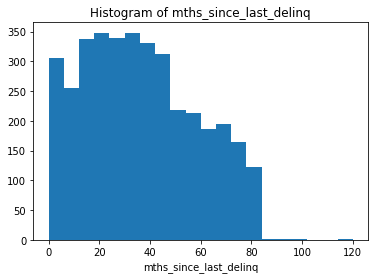

In [26]:
ax = df['mths_since_last_delinq'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_delinq')
ax.set_title("Histogram of mths_since_last_delinq")

In [27]:
mw.data_summary(df[['mths_since_last_delinq', 'annual_inc']])

mths_since_last_delinq annual_inc
Data Type                            float64    float64
Mean                                 35.8903      68203
Standard Deviation                   22.3614    48590.3
Median                                    34      58000
Min                                        0       2000
Max                                      120     900000
# Zeros                                  163          0
# Nulls                                 6316          1
% Most Frequent Value                   1.63       3.81

Text(0.5, 1.0, 'Histogram of mths_since_last_record')

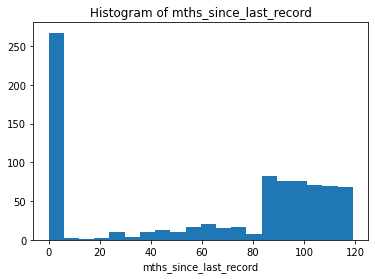

In [28]:
ax = df['mths_since_last_record'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_record')
ax.set_title("Histogram of mths_since_last_record")

In [29]:
mw.data_summary(df[['mths_since_last_record', 'annual_inc']])

mths_since_last_record annual_inc
Data Type                            float64    float64
Mean                                 61.6524      68203
Standard Deviation                   46.1896    48590.3
Median                                    86      58000
Min                                        0       2000
Max                                      119     900000
# Zeros                                  267          0
# Nulls                                 9160          1
% Most Frequent Value                   2.67       3.81

Text(0.5, 1.0, 'Histogram of pub_rec')

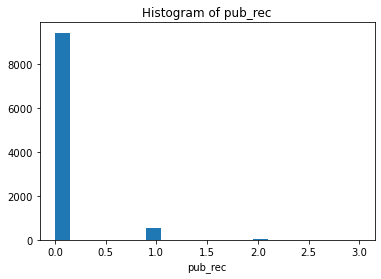

In [30]:
ax = df['pub_rec'].hist(bins=20, grid=False) 
ax.set_xlabel('pub_rec')
ax.set_title("Histogram of pub_rec")

In [31]:
mw.data_summary(df[['pub_rec', 'annual_inc']])

pub_rec annual_inc
Data Type                float64    float64
Mean                   0.0601301      68203
Standard Deviation      0.251245    48590.3
Median                         0      58000
Min                            0       2000
Max                            3     900000
# Zeros                     9422          0
# Nulls                        5          1
% Most Frequent Value      94.22       3.81

Text(0.5, 1.0, 'Histogram of total_acc')

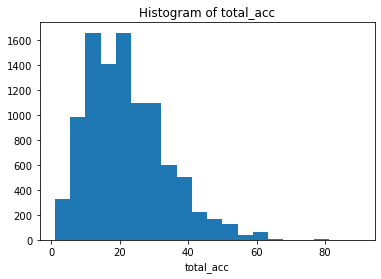

In [32]:
ax = df['total_acc'].hist(bins=20, grid=False) 
ax.set_xlabel('total_acc')
ax.set_title("Histogram of total_acc")

In [33]:
mw.data_summary(df[['total_acc', 'annual_inc']])

total_acc annual_inc
Data Type               float64    float64
Mean                    22.0113      68203
Standard Deviation      11.7094    48590.3
Median                       20      58000
Min                           1       2000
Max                          90     900000
# Zeros                       0          0
# Nulls                       5          1
% Most Frequent Value      3.69       3.81

Text(0.5, 1.0, 'Histogram of collections_12_mths_ex_med')

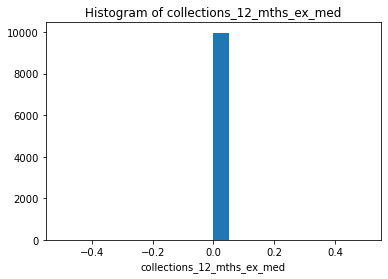

In [34]:
ax = df['collections_12_mths_ex_med'].hist(bins=20, grid=False) 
ax.set_xlabel('collections_12_mths_ex_med')
ax.set_title("Histogram of collections_12_mths_ex_med")

In [35]:
mw.data_summary(df[['collections_12_mths_ex_med', 'annual_inc']])

collections_12_mths_ex_med annual_inc
Data Type                                float64    float64
Mean                                           0      68203
Standard Deviation                             0    48590.3
Median                                         0      58000
Min                                            0       2000
Max                                            0     900000
# Zeros                                     9968          0
# Nulls                                       32          1
% Most Frequent Value                      99.68       3.81

Text(0.5, 1.0, 'Histogram of mths_since_last_major_derog')

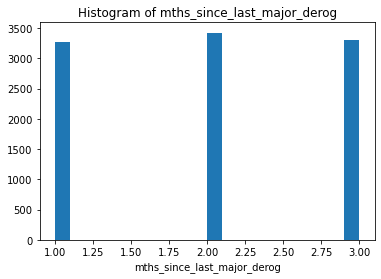

In [36]:
ax = df['mths_since_last_major_derog'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_major_derog')
ax.set_title("Histogram of mths_since_last_major_derog")

In [37]:
mw.data_summary(df[['mths_since_last_major_derog', 'annual_inc']])

mths_since_last_major_derog annual_inc
Data Type                                   int64    float64
Mean                                       2.0022      68203
Standard Deviation                       0.810963    48590.3
Median                                          2      58000
Min                                             1       2000
Max                                             3     900000
# Zeros                                         0          0
# Nulls                                         0          1
% Most Frequent Value                       34.24       3.81

# Correlation

In [38]:
mw.correlation_matrix(df, cluster=False)

In [39]:
mw.correlation_matrix(df.drop(['Notes','collections_12_mths_ex_med', 'earliest_cr_line','purpose'],axis=1), categorical=True, cluster=False)

In [40]:
def expand_year(x):
    """Converts YY -> YYYY

    Assumes there are no records in the current year, which will be returned as-is
    """
    this_year = datetime.datetime.now().strftime("%y")
    if int(x[::-1][:2][::-1]) < int(this_year):
        return x[0:len(x) - 2] + "20" + x[len(x) - 2:]
    elif int(x[::-1][:2][::-1]) > int(this_year):
        return x[0:len(x) - 2] + "19" + x[len(x) - 2:]
    else:
        return x

In [41]:
earliest_cr = df.earliest_cr_line.dropna()

In [42]:
earliest_cr = earliest_cr.astype(str)

In [43]:
earliest_cr = pd.to_datetime(earliest_cr.apply(lambda x: expand_year(x)))

In [44]:
earliest_cr_line_yr = earliest_cr.dt.year

In [45]:
earliest_cr_line_yr = earliest_cr_line_yr.astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

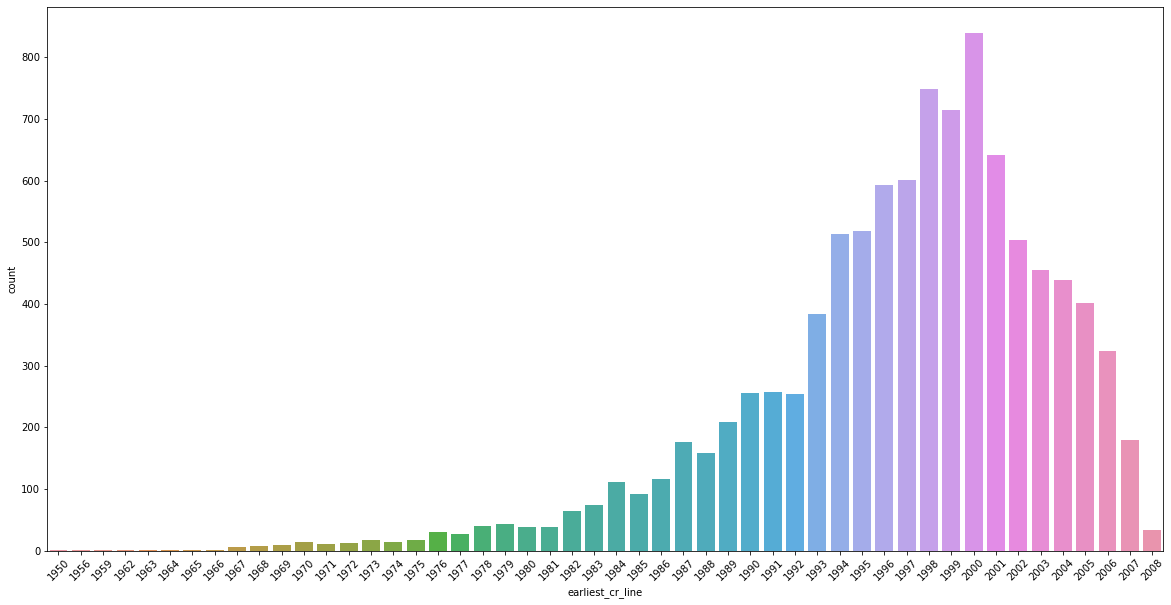

In [46]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='earliest_cr_line', data=pd.DataFrame(earliest_cr_line_yr))
plt.xticks(rotation=45)

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

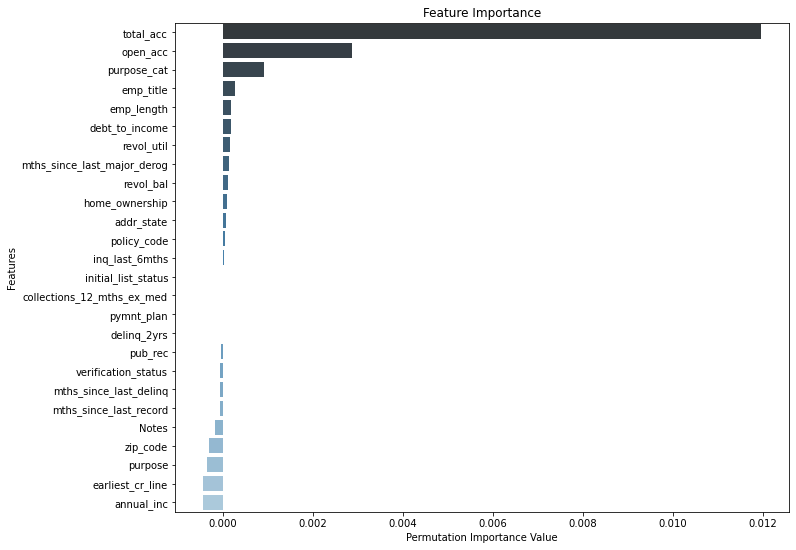

In [47]:
mw.importance(df, "is_bad", truncate=False)

# Scatter plots

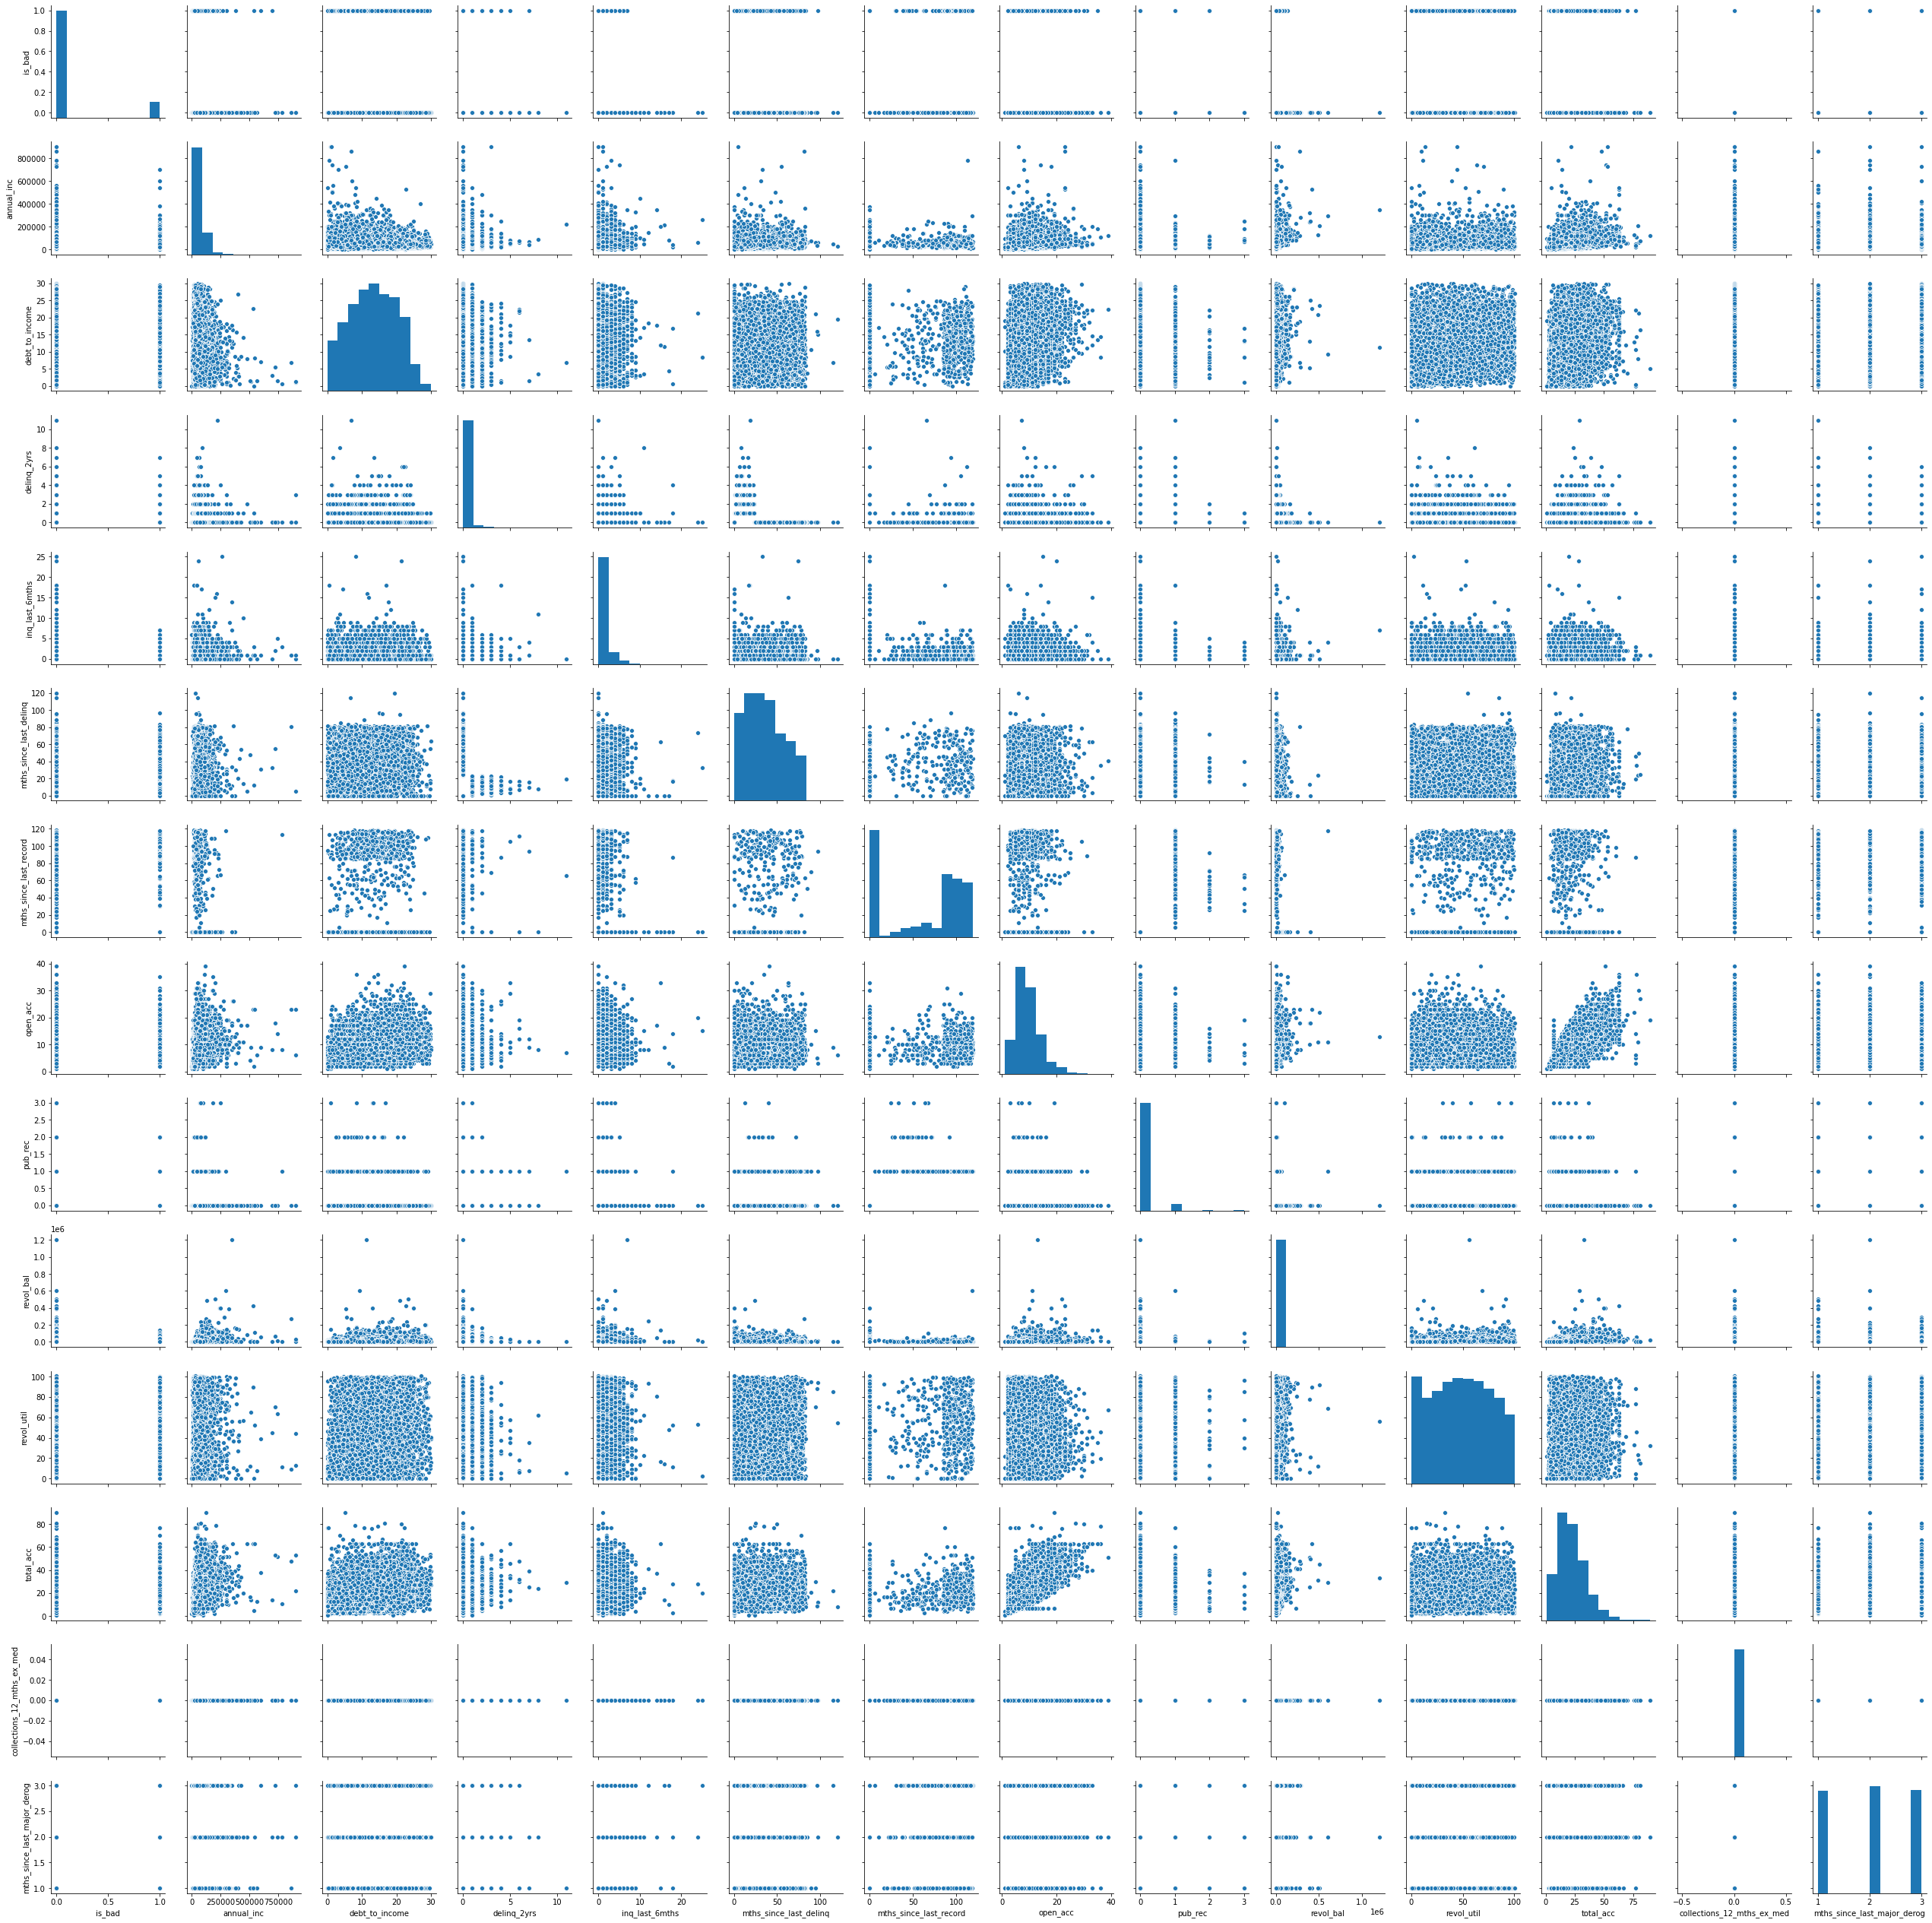

In [48]:
mw.scatter_plots(df, plot_mode='matrix')

/opt/conda/envs/sanofi_py37/lib/python3.7/site-packages/mwdata/core/cluster.py:107: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



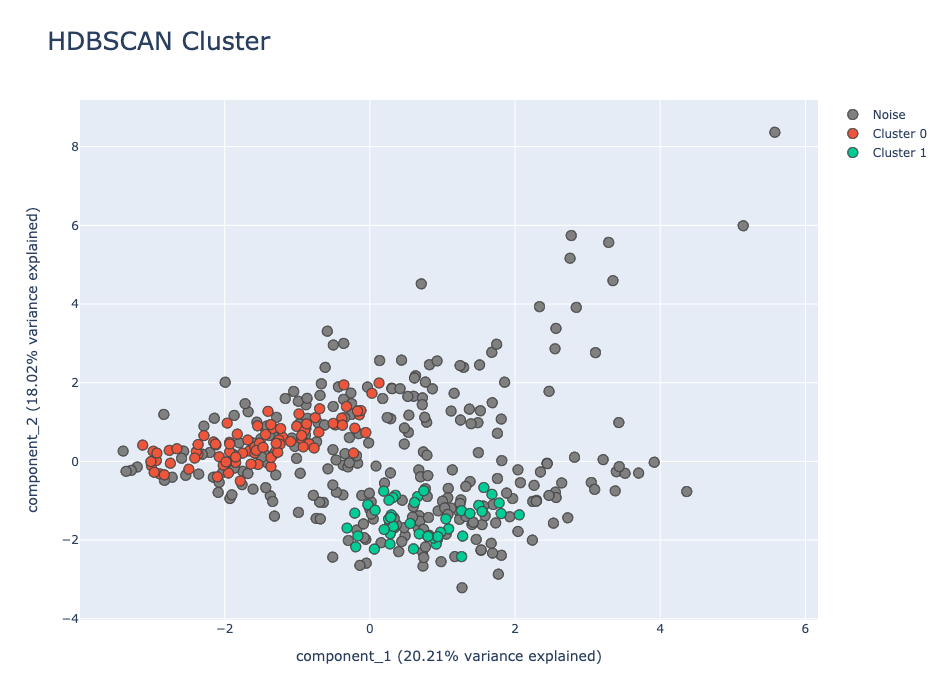

In [49]:
mw.cluster(df.dropna(), method='HDBSCAN')

# Explore clustering

In [50]:
import numpy as np

In [51]:
data_cluster = df.select_dtypes(['number'])
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_cluster = pd.DataFrame(imp.fit_transform(data_cluster), columns=data_cluster.columns.values)

In [52]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=17)
clusterer = hdb.fit(data_cluster)

In [53]:
data_cluster.shape

(10000, 14)

In [54]:
# inspect_cluster_number = 0
# data_cluster.loc[clusterer.labels_ == inspect_cluster_number, ].head()
data_cluster['cluster'] = clusterer.labels_

In [55]:
mw.data_summary(data_cluster)

is_bad annual_inc debt_to_income delinq_2yrs  \
Data Type               float64    float64        float64     float64   
Mean                     0.1295      68203        13.3387    0.148174   
Standard Deviation     0.335769    48587.8        6.75421    0.506143   
Median                        0      58000          13.41           0   
Min                           0       2000              0           0   
Max                           1     900000          29.99          11   
# Zeros                    8705          0             58        8910   
# Nulls                       0          0              0           0   
% Most Frequent Value     87.05       3.81           0.58        89.1   

                      inq_last_6mths mths_since_last_delinq  \
Data Type                    float64                float64   
Mean                         1.06693                35.8903   
Standard Deviation           1.47568                13.5713   
Median                             1                35.8903   
Min                                0                      0   
Max                               25                    120   
# Zeros                         4602                    163   
# Nulls                            0                      0   
% Most Frequent Value          46.02                  63.16   

                      mths_since_last_record open_acc    pub_rec    revol_bal  \
Data Type                            float64  float64    float64      float64   
Mean                                 61.6524  9.33457  0.0601301        14271   
Standard Deviation                   13.3797  4.52546   0.251182      25437.9   
Median                               61.6524        9          0       8645.5   
Min                                        0        1          0            0   
Max                                      119       39          3  1.20736e+06   
# Zeros                                  267        0       9422          278   
# Nulls                                    0        0          0            0   
% Most Frequent Value                   91.6    10.35      94.22         2.78   

                      revol_util total_acc collections_12_mths_ex_med  \
Data Type                float64   float64                    float64   
Mean                     48.4508   22.0113                          0   
Standard Deviation       28.1838   11.7065                          0   
Median                      48.5        20                          0   
Min                            0         1                          0   
Max                        100.6        90                          0   
# Zeros                      254         0                      10000   
# Nulls                        0         0                          0   
% Most Frequent Value       2.54      3.69                        100   

                      mths_since_last_major_derog  cluster  
Data Type                                 float64    int64  
Mean                                       2.0022  -0.0477  
Standard Deviation                       0.810963  0.22634  
Median                                          2        0  
Min                                             1       -1  
Max                                             3        1  
# Zeros                                         0     9465  
# Nulls                                         0        0  
% Most Frequent Value                       34.24    94.65

In [56]:
data_cluster.head()

is_bad  annual_inc  debt_to_income  delinq_2yrs  inq_last_6mths  \
0     0.0     50000.0           10.87          0.0             0.0   
1     0.0     39216.0            9.15          0.0             2.0   
2     0.0     65000.0           11.24          0.0             0.0   
3     0.0     57500.0            6.18          1.0             0.0   
4     0.0     50004.0           19.03          0.0             4.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0               35.890337               61.652381      15.0      0.0   
1               35.890337               61.652381       4.0      0.0   
2               35.890337               61.652381       4.0      0.0   
3               16.000000               61.652381       6.0      0.0   
4               35.890337               61.652381       8.0      0.0   

   revol_bal  revol_util  total_acc  collections_12_mths_ex_med  \
0    12087.0        12.1       44.0                         0.0   
1    10114.0        64.0        5.0                         0.0   
2       81.0         0.6        8.0                         0.0   
3    10030.0        37.1       23.0                         0.0   
4    10740.0        40.4       21.0                         0.0   

   mths_since_last_major_derog  cluster  
0                          1.0        0  
1                          2.0        0  
2                          3.0        0  
3                          2.0        0  
4                          3.0        0